# Statistics Advanced 2 - Practical Problems

##### Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(95)

import warnings
warnings.filterwarnings('ignore')

### **1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results**

In [2]:
from scipy.stats import norm
import numpy as np

sample = np.random.normal(loc=105, scale=10, size=50)   #loc = mean, scale = sd
population_mean = 100
sample_mean = np.mean(sample)   #Xbar
sample_std = np.std(sample, ddof=1)     #sigma

z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(len(sample)))
p_value = 2 * (1 - norm.cdf(abs(z_score)))  #two tailed

print(f'Z-score: {z_score:.2f}, P-value: {p_value:.4f}')

if p_value < 0.05:
    print("For 5% significance level We Reject the Null Hypothesis")
else:
    print("For 5% significance level We Failed to Reject the Null.")

Z-score: 3.33, P-value: 0.0009
For 5% significance level We Reject the Null Hypothesis


### **2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python**

In [3]:
np.random.seed(95)
data = np.random.normal(loc=102, scale=8, size=40)
pop_mean = 100

z_stat = (np.mean(data) - pop_mean) / (np.std(data, ddof=1) / np.sqrt(len(data)))
p_val = 2 * (1 - norm.cdf(abs(z_stat)))
print(f'Z-statistic: {z_stat:.3f}, P-value: {p_val:.4f}')

Z-statistic: 1.240, P-value: 0.2149


### **3. Implement a one-sample Z-test using Python to compare the sample mean with the population mean**

In [4]:
def one_sample_z_test(sample, mu):
    n = len(sample)
    sample_mean = np.mean(sample)
    std_error = np.std(sample, ddof=1) / np.sqrt(n)
    z = (sample_mean - mu) / std_error
    p = 2 * (1 - norm.cdf(abs(z)))  #Pr(Z > z)
    return z, p

np.random.seed(95)
data = np.random.normal(50, 10, 100)
z, p = one_sample_z_test(data, 52)
print(f'Z-Score: {z:.3f}, P-value: {p:.4f}')

Z-Score: -2.715, P-value: 0.0066


### **4. Perform a two-tailed Z-test using Python and visualize the decision region on a plot**

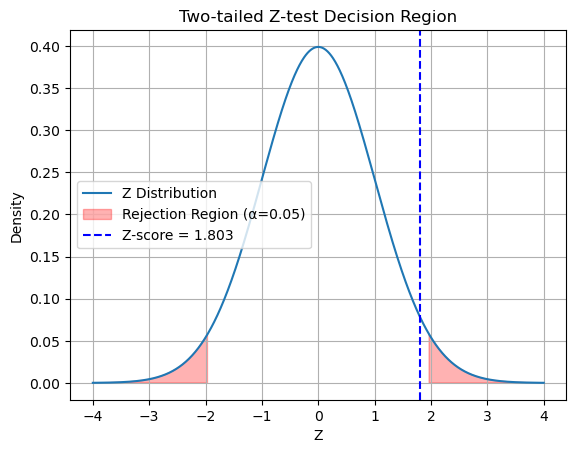

In [5]:
import matplotlib.pyplot as plt
np.random.seed(95)
def one_sample_z_test(sample, mu):
    '''
    sample = data
    mu = population mean
    returns the z score
    '''

    n = len(sample)
    sample_mean = np.mean(sample)
    std_error = np.std(sample, ddof=1) / np.sqrt(n)
    z = (sample_mean - mu) / std_error
    # p = 2 * (1 - norm.cdf(abs(z)))  #Pr(Z > z)
    return z

data = np.random.normal(10, 3, 40)
z_score = one_sample_z_test(data, 9)


x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

plt.plot(x, y, label='Z Distribution')
plt.fill_between(x, y, where=(x < -1.96) | (x > 1.96), color='red', alpha=0.3, label='Rejection Region (α=0.05)')
plt.axvline(z_score, color='blue', linestyle='--', label=f'Z-score = {z_score:.3f}')
plt.legend()
plt.title('Two-tailed Z-test Decision Region')
plt.xlabel('Z')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### **5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing**

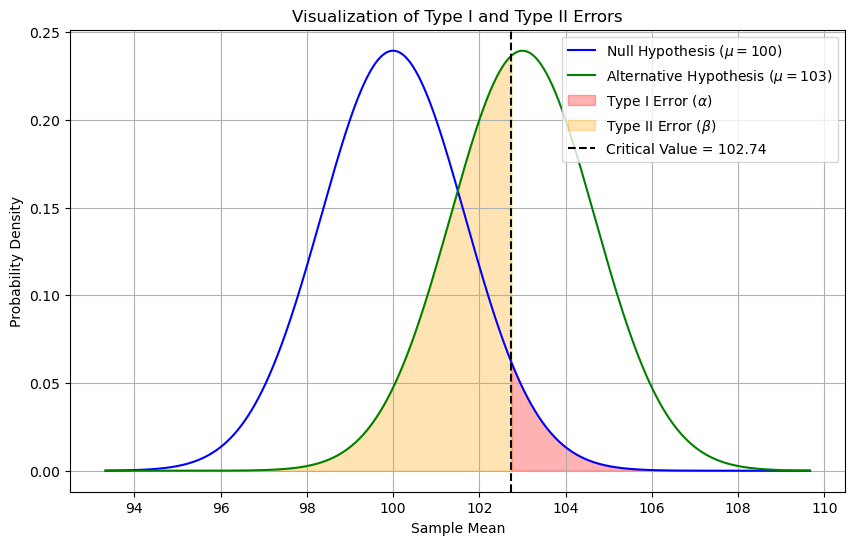

Critical value (x_crit): 102.74
Z for beta: -0.16
Type I Error (alpha): 0.05
Type II Error (beta): 0.4384
Power of the test: 0.5616


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_type1_type2_errors(mu_0, mu_1, sigma, n, alpha=0.05):
    # standard error
    se = sigma / np.sqrt(n)
    
    # Critical value for right-tailed test
    z_alpha = norm.ppf(1 - alpha)   #quantile
    x_crit = mu_0 + z_alpha * se

    # Calculate beta (Type II error)
    z_beta = (x_crit - mu_1) / se
    beta = norm.cdf(z_beta)

    # X range for plotting
    x = np.linspace(mu_0 - 4*se, mu_1 + 4*se, 1000)
    
    # Distributions under H0 and H1
    y_H0 = norm.pdf(x, mu_0, se)
    y_H1 = norm.pdf(x, mu_1, se)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_H0, label='Null Hypothesis ($\mu = {}$)'.format(mu_0), color='blue')
    plt.plot(x, y_H1, label='Alternative Hypothesis ($\mu = {}$)'.format(mu_1), color='green')
    
    # Shade alpha region (Type I Error)
    x_alpha = np.linspace(x_crit, mu_0 + 4*se, 1000)
    plt.fill_between(x_alpha, norm.pdf(x_alpha, mu_0, se), color='red', alpha=0.3, label='Type I Error ($\\alpha$)')

    # Shade beta region (Type II Error)
    x_beta = np.linspace(mu_0 - 4*se, x_crit, 1000)
    plt.fill_between(x_beta, norm.pdf(x_beta, mu_1, se), color='orange', alpha=0.3, label='Type II Error ($\\beta$)')

    # Annotations
    plt.axvline(x_crit, color='black', linestyle='--', label='Critical Value = {:.2f}'.format(x_crit))
    plt.title("Visualization of Type I and Type II Errors")
    plt.xlabel("Sample Mean")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Output results
    print(f"Critical value (x_crit): {x_crit:.2f}")
    print(f"Z for beta: {z_beta:.2f}")
    print(f"Type I Error (alpha): {alpha}")
    print(f"Type II Error (beta): {beta:.4f}")
    print(f"Power of the test: {1 - beta:.4f}")

# Example usage:
visualize_type1_type2_errors(mu_0=100, mu_1=103, sigma=10, n=36, alpha=0.05)


### **6. Write a Python program to perform an independent T-test and interpret the results**

In [7]:
from scipy.stats import ttest_ind

group1 = np.random.normal(100, 15, 50)
group2 = np.random.normal(105, 15, 50)

t_stat, p_val = ttest_ind(group1, group2)
print(f'T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis (H₀) at 5% level of significance")
else:
    print(f"\nFailed to reject the null hypothesis (H₀) at 5% level of significance")

T-statistic: -2.71, P-value: 0.0079

Reject the null hypothesis (H₀) at 5% level of significance


### **7. Perform a paired sample T-test using Python and visualize the comparison results**

Paired T-test: t = 0.71, p = 0.4834


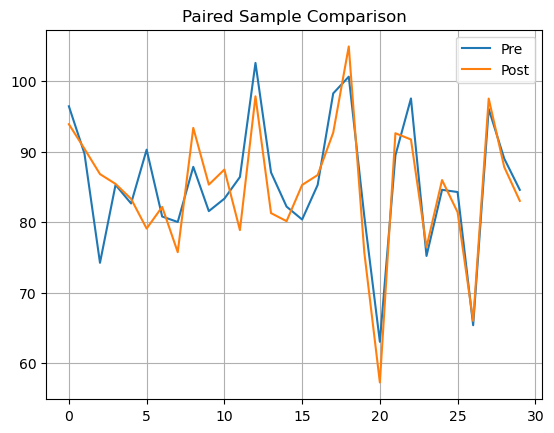

In [8]:
from scipy.stats import ttest_rel

pre = np.random.normal(85, 10, 30)
post = pre + np.random.normal(2, 5, 30)

t_stat, p_val = ttest_rel(pre, post)
print(f'Paired T-test: t = {t_stat:.2f}, p = {p_val:.4f}')

plt.plot(pre, label='Pre')
plt.plot(post, label='Post')
plt.legend()
plt.title('Paired Sample Comparison')
plt.grid(True)
plt.show()

### **8. Simulate data and perform both Z-test and T-test, then compare the results using Python**

In [9]:
from scipy.stats import ttest_1samp

sample = np.random.normal(52, 10, 25)
pop_mean = 50

# Z-test
z_stat = (np.mean(sample) - pop_mean) / (np.std(sample, ddof=1) / np.sqrt(len(sample)))
p_z = 2 * (1 - norm.cdf(abs(z_stat)))

# T-test
t_stat, p_t = ttest_1samp(sample, pop_mean)

print(f'Z-test: Z = {z_stat:.3f}, p = {p_z:.4f}')
print(f'T-test: t = {t_stat:.3f}, p = {p_t:.4f}')

Z-test: Z = 2.114, p = 0.0345
T-test: t = 2.114, p = 0.0451


### **9. Write a Python function to calculate the confidence interval for a sample mean and explain its significance.**

In [10]:
import scipy.stats as stats

def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    se = stats.sem(data)
    margin = stats.t.ppf((1 + confidence) / 2, df=len(data)-1) * se
    return mean - margin, mean + margin

data = np.random.normal(75, 8, 30)
ci = confidence_interval(data)
print(f'95% Confidence Interval: {ci}')

95% Confidence Interval: (71.53083029225897, 78.33336081114302)


### **10. Write a Python program to calculate the margin of error for a given confidence level using sample data**

In [11]:
def margin_of_error(data, confidence=0.95):
    se = stats.sem(data)
    z = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    return z * se

data = np.random.normal(100, 10, 50)
moe = margin_of_error(data)
print(f'Margin of Error: {moe:.2f}')

Margin of Error: 2.60


### **11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process**

In [12]:
def bayes_theorem(prior_A, prob_B_given_A, prob_B):
    return (prob_B_given_A * prior_A) / prob_B

# Example
P_A = 0.01     # Disease prevalence
P_B_A = 0.99   # Test sensitivity
P_B = 0.05     # Probability of positive test

posterior = bayes_theorem(P_A, P_B_A, P_B)
print(f'Posterior Probability: {posterior:.4f}')

Posterior Probability: 0.1980


### **12. Perform a Chi-square test for independence between two categorical variables in Python**

In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

data = [[30, 10], [20, 40]]
chi2, p, dof, expected = chi2_contingency(data)
print(f'Chi2 Statistic: {chi2:.2f}, P-value: {p:.4f}')

Chi2 Statistic: 15.04, P-value: 0.0001


### **13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data**

In [14]:
observed = np.array([[15, 25], [20, 40]])
chi2, p, dof, expected = chi2_contingency(observed)
print('Expected Frequencies:')
print(expected)

Expected Frequencies:
[[14. 26.]
 [21. 39.]]


### **14. Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution**

In [15]:
observed = [20, 30, 50]
expected = [25, 25, 50]
chi2_stat, p = stats.chisquare(f_obs=observed, f_exp=expected)
print(f'Chi-square Stat: {chi2_stat:.2f}, P-value: {p:.4f}')

Chi-square Stat: 2.00, P-value: 0.3679


### **15. Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics**

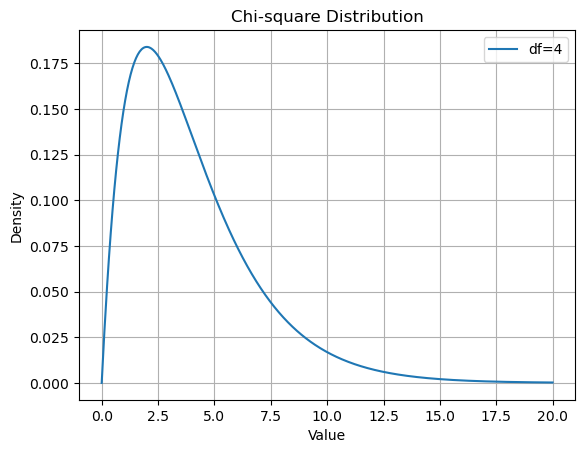

In [16]:
df = 4
x = np.linspace(0, 20, 500)
y = stats.chi2.pdf(x, df)

plt.plot(x, y, label=f'df={df}')
plt.title('Chi-square Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

### **16. Implement an F-test using Python to compare the variances of two random samples**

In [17]:
group1 = np.random.normal(50, 10, 30)
group2 = np.random.normal(50, 15, 30)

f_stat = np.var(group1, ddof=1) / np.var(group2, ddof=1)
print(f'F-statistic: {f_stat:.4f}')

F-statistic: 0.6253


### **17. Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results**

In [18]:
from scipy.stats import f_oneway

a = np.random.normal(50, 5, 30)
b = np.random.normal(52, 5, 30)
c = np.random.normal(55, 5, 30)

f_stat, p_val = f_oneway(a, b, c)
print(f'F-statistic: {f_stat:.3f}, P-value: {p_val:.4f}')

F-statistic: 11.783, P-value: 0.0000


### **18. Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results**

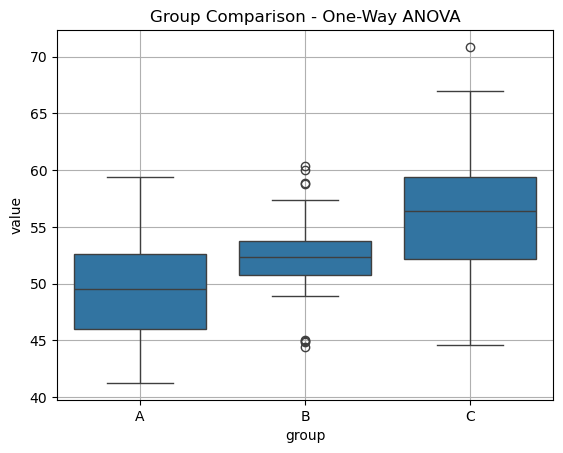

In [19]:
import seaborn as sns
import pandas as pd

data = {
    'value': np.concatenate([a, b, c]),
    'group': ['A'] * 30 + ['B'] * 30 + ['C'] * 30
}
df = pd.DataFrame(data)
sns.boxplot(x='group', y='value', data=df)
plt.title('Group Comparison - One-Way ANOVA')
plt.grid(True)
plt.show()

### **19. Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA**

In [20]:
df = pd.DataFrame({
    'group': np.repeat(['A', 'B', 'C'], 20),
    'value': np.concatenate([
        np.random.normal(10, 2, 20),
        np.random.normal(12, 2, 20),
        np.random.normal(14, 2, 20)
    ])
})
df.head()

,group,value
0,A,10.309304
1,A,8.068092
2,A,10.673166
3,A,8.915447
4,A,8.111125


1. Normality Test (Shapiro-Wilk):
  Group A: p-value = 0.2045 Normal
  Group B: p-value = 0.4249 Normal
  Group C: p-value = 0.1724 Normal

2. Homogeneity of Variance Test (Levene's):
  Levene's Test p-value = 0.9253 Equal Variances

3. Independence (Residual Plot):


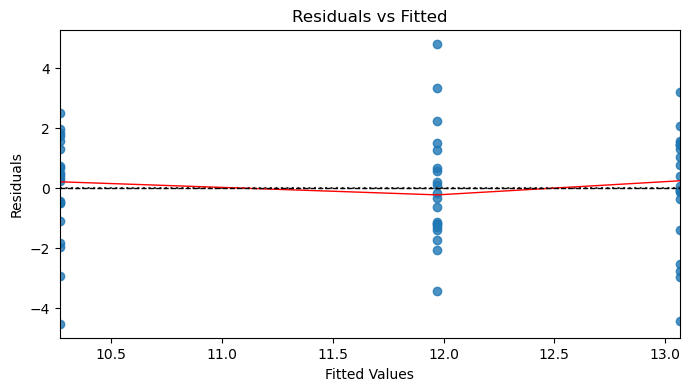

There is no randomness in the residual plot then we can conclude the groups are not independent of each other.


In [21]:
# Shapiro-Wilk test for normality gives the p value, also alternatively we could have used the Q-Q Plot to visualize normality

# Levene's Test for HomoScedasticity (Equality of variance)

# To check independence we plot the residual vs fitted values plot. we will use least sq to fit 

from scipy.stats import shapiro, levene
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
from statsmodels.formula.api import ols

def check_anova_assumptions(data, group_col, value_col, alpha=0.05):
    """
    Checks ANOVA assumptions: normality, independence (via residual plot), and equal variances.
    
    Parameters:
        data (pd.DataFrame): The dataset containing group and value columns.
        group_col (str): The name of the column representing groups.
        value_col (str): The name of the column representing numerical values.
        alpha (float): Significance level for tests (default = 0.05).
    """

    # 1. Normality (Shapiro-Wilk Test for each group)
    print("1. Normality Test (Shapiro-Wilk):")
    for group in data[group_col].unique():
        group_data = data[data[group_col] == group][value_col]
        stat, p = stats.shapiro(group_data)
        print(f"  Group {group}: p-value = {p:.4f}", 
            "Normal" if p > alpha else "Not Normal")

    # ------------------------------
    # 2. Equal Variance (Levene’s Test)
    # ------------------------------
    print("\n2. Homogeneity of Variance Test (Levene's):")
    groups = [group[value_col].values for _, group in data.groupby(group_col)]
    stat, p = stats.levene(*groups)
    print(f"  Levene's Test p-value = {p:.4f}", 
        "Equal Variances" if p > alpha else "Variances Differ")

    # ------------------------------
    # 3. Independence (Residuals vs Fitted Plot)
    # ------------------------------
    print("\n3. Independence (Residual Plot):")
    model = ols(f"{value_col} ~ C({group_col})", data=data).fit()
    fitted = model.fittedvalues
    residuals = model.resid

    # Plot Residuals
    plt.figure(figsize=(8, 4))
    sns.residplot(x=fitted, y=residuals, lowess=True, 
                line_kws={'color': 'red', 'lw': 1})
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Fitted")
    plt.axhline(0, linestyle='--', color='black', linewidth=1)
    plt.show()

    print("There is no randomness in the residual plot then we can conclude the groups are not independent of each other.")


# Simulated example data
df = pd.DataFrame({
    'group': np.repeat(['A', 'B', 'C'], 20),
    'value': np.concatenate([
        np.random.normal(10, 2, 20),
        np.random.normal(12, 2, 20),
        np.random.normal(14, 2, 20)
    ])
})

check_anova_assumptions(data = df, group_col='group', value_col='value')


### **20. Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the results**

In [22]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data = pd.DataFrame({
    'score': np.random.normal(75, 10, 60),
    'group': ['A']*20 + ['B']*20 + ['C']*20,
    'condition': ['X']*10 + ['Y']*10 + ['X']*10 + ['Y']*10 + ['X']*10 + ['Y']*10
})

model = ols('score ~ group + condition + group:condition', data=data).fit()
anova_results = anova_lm(model)
print(anova_results)

                   df       sum_sq     mean_sq         F    PR(>F)
group             2.0    56.240407   28.120204  0.302374  0.740305
condition         1.0     0.670307    0.670307  0.007208  0.932656
group:condition   2.0   272.542952  136.271476  1.465312  0.240044
Residual         54.0  5021.904904   92.998239       NaN       NaN


### **21. Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing**

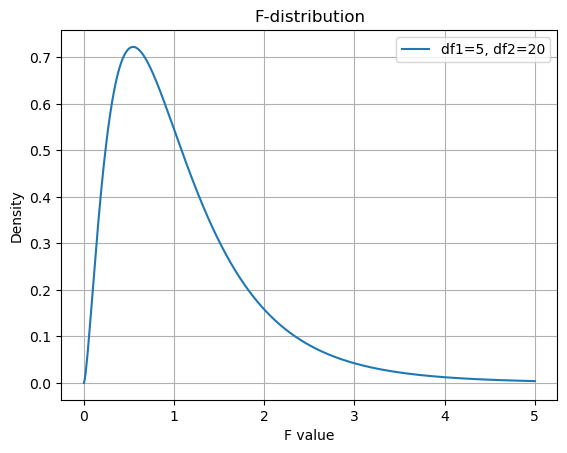

In [23]:
from scipy.stats import f

df1, df2 = 5, 20
x = np.linspace(0, 5, 500)
y = f.pdf(x, df1, df2)

plt.plot(x, y, label=f'df1={df1}, df2={df2}')
plt.title('F-distribution')
plt.xlabel('F value')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

- The primary usecase of F distribution as F-test which is mostly used to compare multiple groups and while applying **ANOVA**.

### **22. Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means**

ANOVA F-statistic: 21.509, p-value: 0.0000


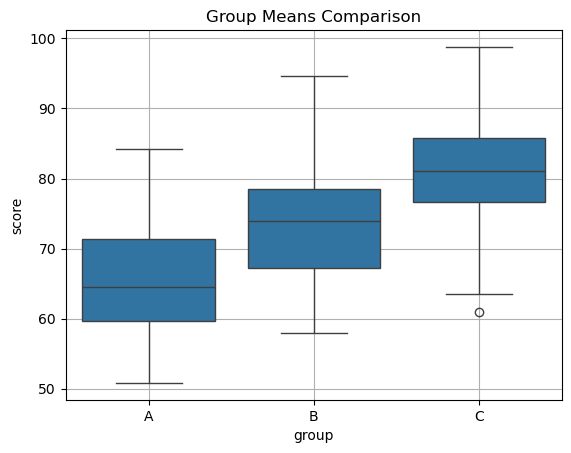

In [24]:
import seaborn as sns

a = np.random.normal(70, 10, 30)
b = np.random.normal(75, 10, 30)
c = np.random.normal(80, 10, 30)

data = pd.DataFrame({
    'score': np.concatenate([a, b, c]),
    'group': ['A']*30 + ['B']*30 + ['C']*30
})

f_stat, p = f_oneway(a, b, c)
print(f'ANOVA F-statistic: {f_stat:.3f}, p-value: {p:.4f}')

sns.boxplot(x='group', y='score', data=data)
plt.title('Group Means Comparison')
plt.grid(True)
plt.show()

### **23. Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means**

In [25]:
data = np.random.normal(loc=100, scale=15, size=50)
mu = 105
t_stat, p_val = stats.ttest_1samp(data, mu)
print(f'T-test for mean=105: t = {t_stat:.2f}, p = {p_val:.4f}')

T-test for mean=105: t = -3.42, p = 0.0013


### **24. Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results**

In [26]:
sample = np.random.normal(100, 10, 25)
claimed_variance = 100
sample_var = np.var(sample, ddof=1)
chi2_stat = (len(sample) - 1) * sample_var / claimed_variance
p = 2 * min(stats.chi2.cdf(chi2_stat, df=24), 1 - stats.chi2.cdf(chi2_stat, df=24))
print(f'Chi-square test statistic: {chi2_stat:.2f}, p-value: {p:.4f}')

Chi-square test statistic: 25.45, p-value: 0.7632


### **25. Write a Python script to perform a Z-test for comparing proportions between two datasets or groups**

In [27]:
def z_test_proportions(p1, p2, n1, n2):
    p_combined = (p1*n1 + p2*n2) / (n1 + n2)
    se = np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
    z = (p1 - p2) / se
    p_value = 2 * (1 - norm.cdf(abs(z)))
    return z, p_value

z, p = z_test_proportions(0.6, 0.5, 100, 120)
print(f'Z = {z:.3f}, P-value = {p:.4f}')

Z = 1.483, P-value = 0.1380


### **26. Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results**

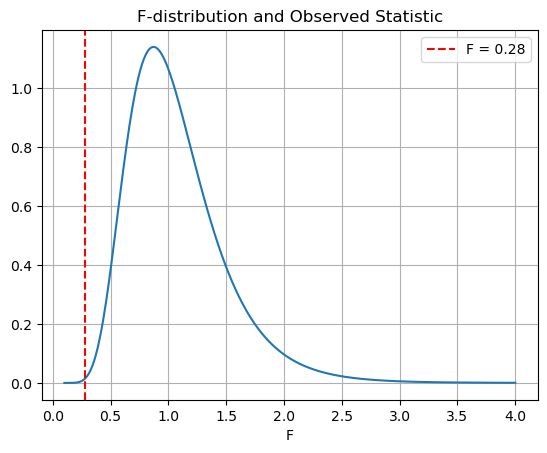

F-statistic: 0.28


In [28]:
data1 = np.random.normal(80, 5, 30)
data2 = np.random.normal(80, 10, 30)
f_stat = np.var(data1, ddof=1) / np.var(data2, ddof=1)

x = np.linspace(0.1, 4, 500)
plt.plot(x, f.pdf(x, dfn=29, dfd=29))
plt.axvline(f_stat, color='red', linestyle='--', label=f'F = {f_stat:.2f}')
plt.title('F-distribution and Observed Statistic')
plt.xlabel('F')
plt.legend()
plt.grid(True)
plt.show()

print(f'F-statistic: {f_stat:.2f}')

### **27. Perform a Chi-square test for goodness of fit with simulated data and analyze the results**

In [29]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# we rolled a die 120 times and noted down the frequency of each sides

observed = np.array([15, 20, 18, 22, 25, 20])  # sum = 120

# Expected frequencies if the die is fair 
expected = np.array([20, 20, 20, 20, 20, 20])  # 120 rolls, 6 sides

chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Decision
if p_value < 0.05:
    print("Reject the Null")
else:
    print("Failed to Reject the Null")

Chi-square Statistic: 2.9000
P-value: 0.7154
Failed to Reject the Null


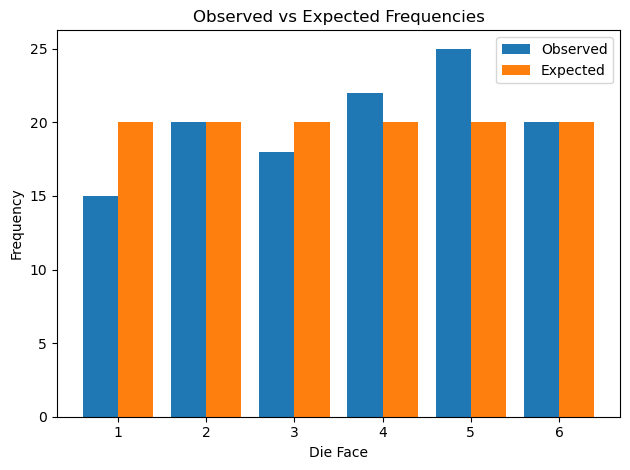

In [30]:
labels = ['1', '2', '3', '4', '5', '6'] #sides
x = np.arange(len(labels))

plt.bar(x - 0.2, observed, width=0.4, label='Observed')
plt.bar(x + 0.2, expected, width=0.4, label='Expected')
plt.xticks(x, labels)
plt.xlabel('Die Face')
plt.ylabel('Frequency')
plt.title('Observed vs Expected Frequencies')
plt.legend()
plt.tight_layout()
plt.show()